In [1]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from lib.EmbedingsManiger import EmbedingsManiger
from matplotlib import pyplot as plt
import torch
lp = Locate_ppl()
rec = Recognizer("test")
emb_maniger = EmbedingsManiger()
pe = PersonEmbeding()

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\pytorch_vision_v0.5.0
models/test.ckpt not found ...
Starting with random weights


In [2]:
print(emb_maniger.info)

{'Arturas', 'Happy'}


In [3]:
#emb_maniger.remove("Happy")

True

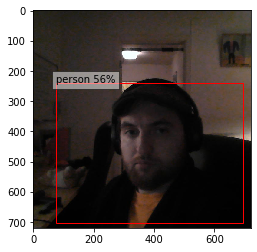

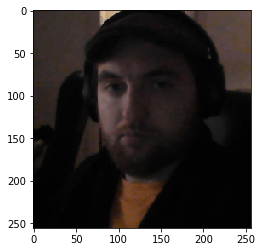

In [4]:
ppl = lp.snap()

In [6]:
p = next(iter(ppl))
print(p.shape)
emb = pe.embed(ppl)
print(emb.shape)
r = rec(emb)
print(r)

(256, 256, 3)
torch.Size([1, 512])
tensor([[0.4489, 0.5511]])


In [5]:
a = []
l = []

In [6]:
def get_data(data, it=3):
    c = 0
    for img in lp:
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = pe.gen_training_emb(img)
        for e in emb:
            data.append(e)
        c+=1
        if c >= it:
            break

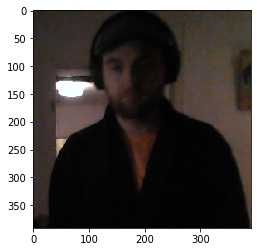

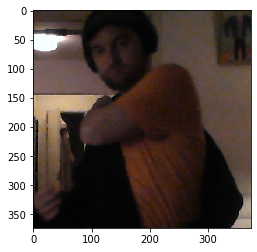

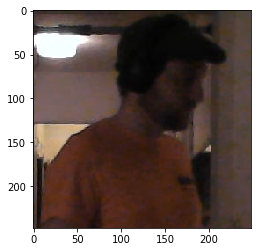

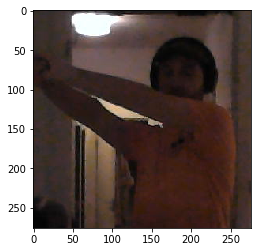

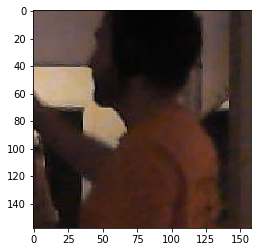

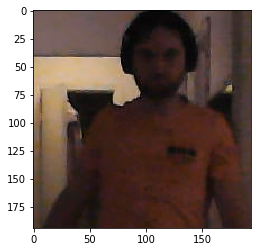

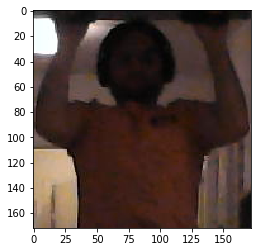

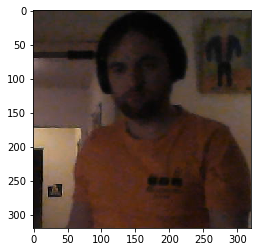

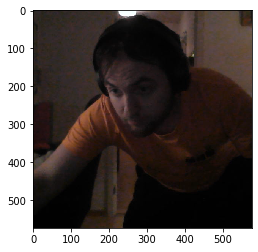

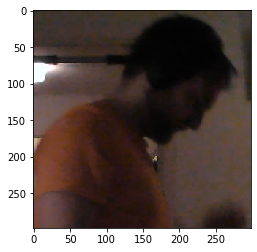

160

In [7]:
get_data(a, 10)
len(a)

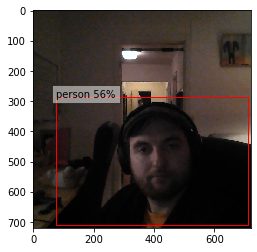

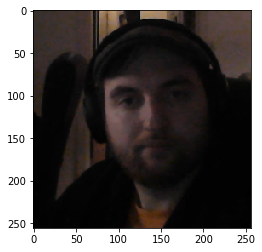

In [6]:
ppl = lp.snap()

In [8]:
#emb_maniger.new("Arturas", ppl, a)

emb_maniger.add("Arturas", a)

True

In [9]:
emb_maniger.get_len("Arturas")

256

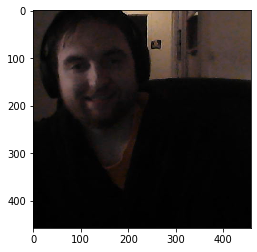

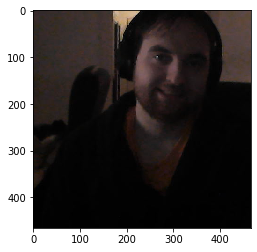

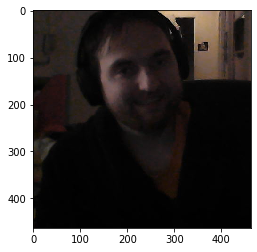

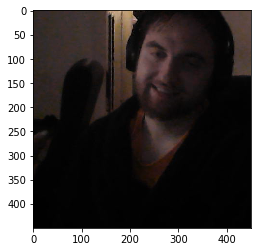

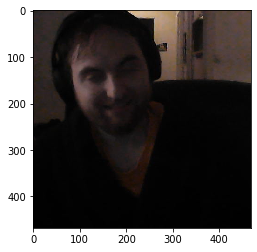

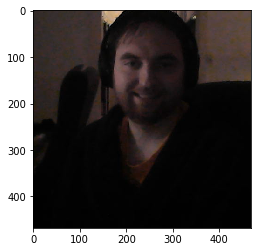

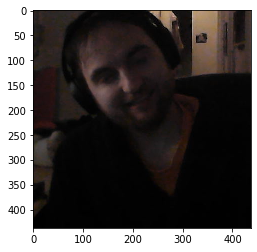

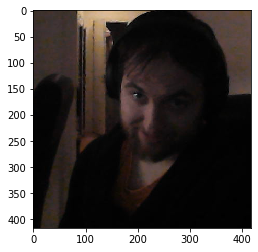

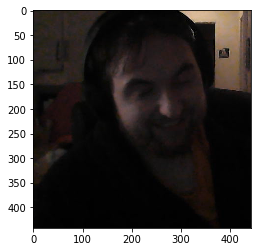

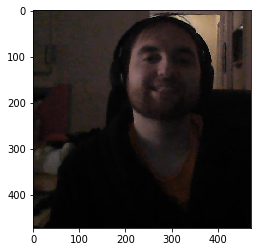

160

In [10]:
get_data(l, 10)
len(l)

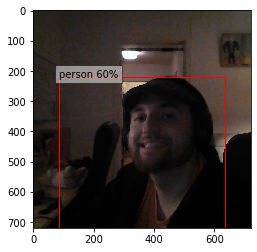

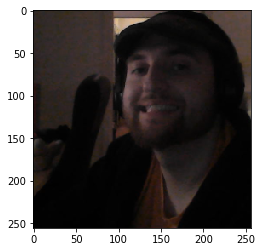

In [19]:
ppl = lp.snap()

In [20]:
emb_maniger.new("Happy",ppl, l)

True

In [3]:
models = [Recognizer("Arturas"),Recognizer("Happy")]

Loading models/Arturas.ckpt
Loading models/Happy.ckpt


In [4]:
for person in models:
    for i in range(10):
        person.get_beter(emb_maniger)

curret loss:0.0024473137746099383
curret loss:0.0023189562343759462
curret loss:0.0022161192100611515
curret loss:0.002131439461663831
curret loss:0.002071262864774326
curret loss:0.0020108302051085047
curret loss:0.001975355167814996
curret loss:0.0019276322054793127
curret loss:0.0018815087751136161
curret loss:0.0018469914539309684
curret loss:0.00286212470382452
curret loss:0.0027341554523445666
curret loss:0.002604079630691558
curret loss:0.0024798728176392616
curret loss:0.002355214394629002
curret loss:0.0022804458858445287
curret loss:0.0022310163243673743
curret loss:0.0021440308075398205
curret loss:0.002097373304422945
curret loss:0.002059853746322915


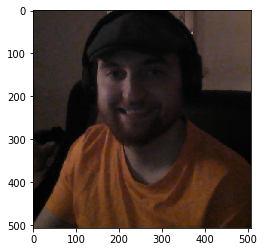

Arturas tensor(0.6861)
Happy tensor(0.4970)


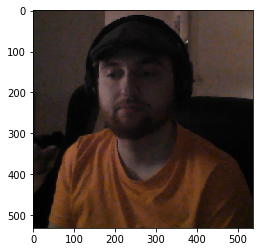

Arturas tensor(0.5515)
Happy tensor(0.5550)


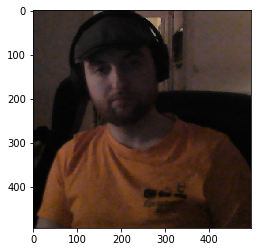

Arturas tensor(0.8415)
Happy tensor(0.2401)


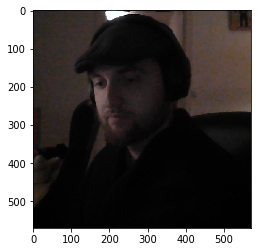

Arturas tensor(0.5578)
Happy tensor(0.4097)


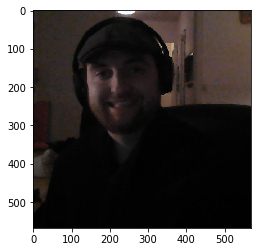

Arturas tensor(0.4242)
Happy tensor(0.5837)


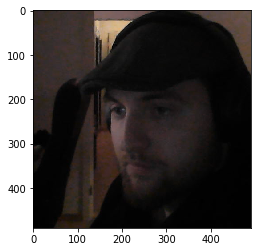

Arturas tensor(0.8822)
Happy tensor(0.3389)


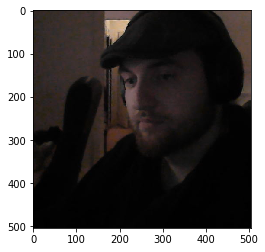

Arturas tensor(0.5855)
Happy tensor(0.5606)


In [27]:
for img in lp:
    for i in img:
        plt.imshow(i)
        plt.show()
    
    emb = pe.embed(img)
    for reco in models:
        r = reco(emb)
        for p in r:
            print(reco.name, p[1])
    msg = input("press enter for next:")
    if len(msg) > 1:
        break

In [4]:
for m in models:
    m.save()

Model saved at: models/Arturas.ckpt
Model saved at: models/Happy.ckpt
